In [1]:
import numpy as np
import pandas as pd
import requests
#from config import api_key
import time
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
from fredapi import Fred
fred = Fred(api_key='insert key')


In [2]:
#STEP 1 CSV - reading the CSV
inf_path="inflation.csv"

inflation = pd.read_csv(inf_path)

df3 = pd.DataFrame(inflation)

#df3.head()
#print(df3.dtypes)

In [3]:
#STEP 2 CSV - Rename CSV Date
df_new = df3.rename(columns={'Date': 'qtr_dt'})
df_new

,qtr_dt,INF
0,1947-01-01,18.87
1,1947-04-01,18.33
2,1947-07-01,12.07
3,1947-10-01,9.30
4,1948-01-01,8.77
...,...,...
287,2018-10-01,2.20
288,2019-01-01,1.67
289,2019-04-01,1.80
290,2019-07-01,1.73


In [4]:
#STEP 3 CSV - Convert qtr_dt to datetime
df_new['qtr_dt'] = pd.to_datetime(df_new['qtr_dt'])
df_new

,qtr_dt,INF
0,1947-01-01,18.87
1,1947-04-01,18.33
2,1947-07-01,12.07
3,1947-10-01,9.30
4,1948-01-01,8.77
...,...,...
287,2018-10-01,2.20
288,2019-01-01,1.67
289,2019-04-01,1.80
290,2019-07-01,1.73


In [5]:
#CSV type
print(df_new.dtypes)

qtr_dt    datetime64[ns]
INF              float64
dtype: object


In [6]:
#FRED API Step 1 - store it in data1
data1 = fred.get_series('GDPC1',frequency = 'q')
print(data1.head())
print(type(data1))
#print(data1.dtypes)

1947-01-01    2033.061
1947-04-01    2027.639
1947-07-01    2023.452
1947-10-01    2055.103
1948-01-01    2086.017
dtype: float64
<class 'pandas.core.series.Series'>


In [7]:
#FRED API Step 2 - store it in a dictionary
test_df = {}
test_df['GDP'] = fred.get_series('GDPC1',frequency = 'q')
test_df = pd.DataFrame(test_df)
print(test_df)

                  GDP
1947-01-01   2033.061
1947-04-01   2027.639
1947-07-01   2023.452
1947-10-01   2055.103
1948-01-01   2086.017
...               ...
2019-01-01  18927.281
2019-04-01  19021.860
2019-07-01  19121.112
2019-10-01  19221.970
2020-01-01  18977.363

[293 rows x 1 columns]


In [8]:
#FRED API Step 3 - rename index
test_df.index.name = 'qtr_dt'
test_df

,GDP
qtr_dt,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2019-01-01,18927.281
2019-04-01,19021.860
2019-07-01,19121.112


In [9]:
#FRED API Step 4 - Reset index
new_test_df = test_df.reset_index()
new_test_df

,qtr_dt,GDP
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017
...,...,...
288,2019-01-01,18927.281
289,2019-04-01,19021.860
290,2019-07-01,19121.112
291,2019-10-01,19221.970


In [10]:
#MERGE
merge_df2 = pd.merge(df_new, new_test_df, on="qtr_dt")
merge_df2.head()

,qtr_dt,INF,GDP
0,1947-01-01,18.87,2033.061
1,1947-04-01,18.33,2027.639
2,1947-07-01,12.07,2023.452
3,1947-10-01,9.30,2055.103
4,1948-01-01,8.77,2086.017


In [11]:
#STEP 1 Unemployment 
data2 = fred.get_series('UNRATE',frequency = 'q')
data2.head()

1948-01-01    3.7
1948-04-01    3.7
1948-07-01    3.8
1948-10-01    3.8
1949-01-01    4.7
dtype: float64

In [12]:
#STEP 2 Unemployment - store into dictionary
unrate_df = {}
unrate_df['UR'] = fred.get_series('UNRATE',frequency = 'q')
unrate_df = pd.DataFrame(unrate_df)
unrate_df.head()

,UR
1948-01-01,3.7
1948-04-01,3.7
1948-07-01,3.8
1948-10-01,3.8
1949-01-01,4.7


In [13]:
#STEP 3 Unemployment - Rename the index
unrate_df.index.name = 'qtr_dt'
unrate_df

,UR
qtr_dt,
1948-01-01,3.7
1948-04-01,3.7
1948-07-01,3.8
1948-10-01,3.8
1949-01-01,4.7
...,...
2019-04-01,3.6
2019-07-01,3.6
2019-10-01,3.5


In [14]:
#STEP 4 Unemployment - Reset index
new_unrate_df = unrate_df.reset_index()
new_unrate_df.head()

,qtr_dt,UR
0,1948-01-01,3.7
1,1948-04-01,3.7
2,1948-07-01,3.8
3,1948-10-01,3.8
4,1949-01-01,4.7


In [15]:
#CSV type
print(new_unrate_df.dtypes)

qtr_dt    datetime64[ns]
UR               float64
dtype: object


In [16]:
#MERGE Part 2
merge_df3 = pd.merge(merge_df2, new_unrate_df, on="qtr_dt")
merge_df3

,qtr_dt,INF,GDP,UR
0,1948-01-01,8.77,2086.017,3.7
1,1948-04-01,9.10,2120.450,3.7
2,1948-07-01,8.43,2132.598,3.8
3,1948-10-01,4.63,2134.981,3.8
4,1949-01-01,1.43,2105.562,4.7
...,...,...,...,...
283,2018-10-01,2.20,18783.548,3.8
284,2019-01-01,1.67,18927.281,3.9
285,2019-04-01,1.80,19021.860,3.6
286,2019-07-01,1.73,19121.112,3.6


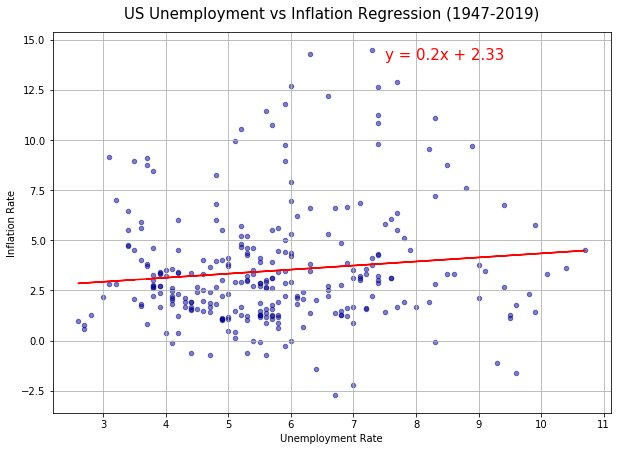

In [24]:
#Regression
x_values = merge_df3['UR']
y_values = merge_df3['INF']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
merge_df3.plot(kind='scatter', x='UR', y='INF', color='darkblue', alpha=0.5, figsize=(10, 7), grid=True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7.5,14),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.title("US Unemployment vs Inflation Regression (1947-2019)", y=1.02, fontsize=15)
plt.savefig("US Unemployment vs Inflation Regression (1947-2019).png")
plt.show()

In [25]:
model=linregress(merge_df3['UR'],merge_df3['INF'])
model

LinregressResult(slope=0.20201524376945662, intercept=2.327304300812969, rvalue=0.11454134803529846, pvalue=0.05216461712935724, stderr=0.10360269927068544)

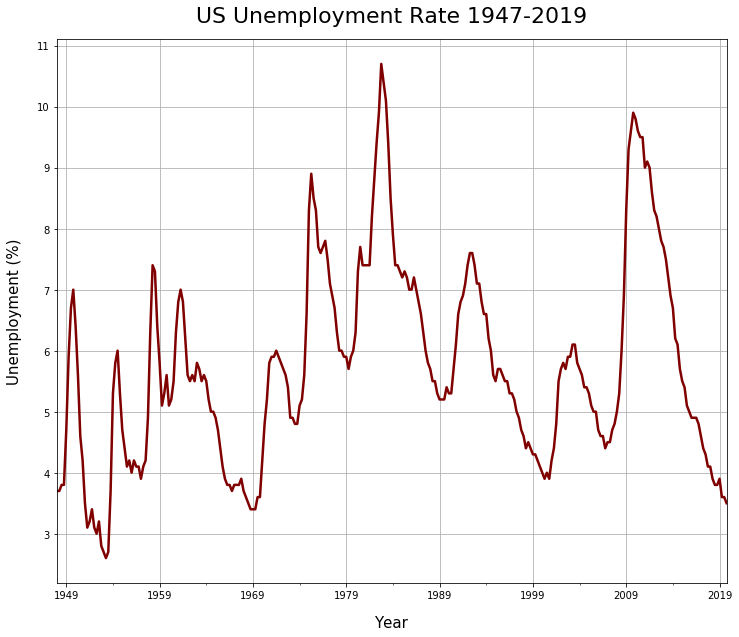

In [26]:
merge_df3.set_index('qtr_dt')['UR'].plot(figsize=(12, 10), linewidth=2.5, color='maroon',grid = True)
plt.xlabel("Year", labelpad=15, fontsize =15)
plt.ylabel("Unemployment (%)", labelpad=15, fontsize =15)
plt.title("US Unemployment Rate 1947-2019", y=1.02, fontsize=22)
plt.savefig("US Unemployment Rate 1947-2019.png")

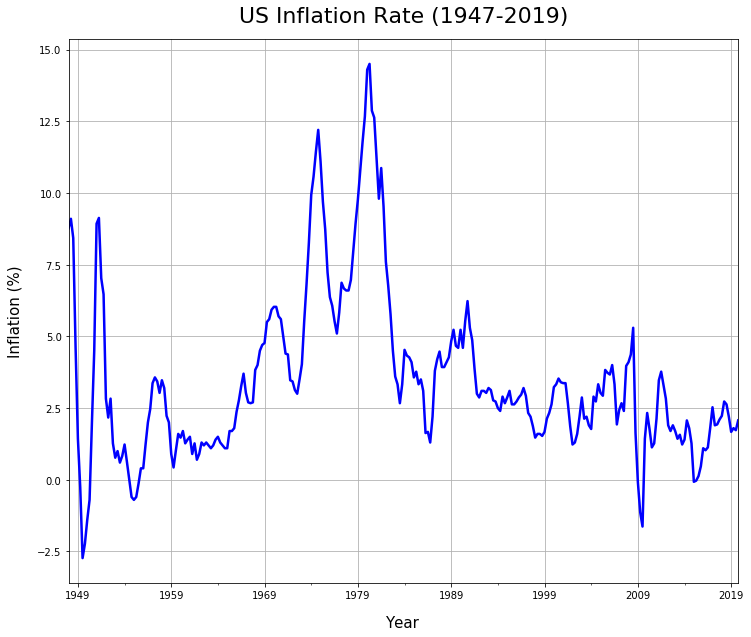

In [27]:
merge_df3.set_index('qtr_dt')['INF'].plot(figsize=(12, 10), linewidth=2.5, color='blue', grid=True)
plt.xlabel("Year", labelpad=15, fontsize =15)
plt.ylabel("Inflation (%)", labelpad=15, fontsize =15)
plt.title("US Inflation Rate (1947-2019)", y=1.02, fontsize=22)
plt.savefig("US Inflation Rate (1947-2019).png")

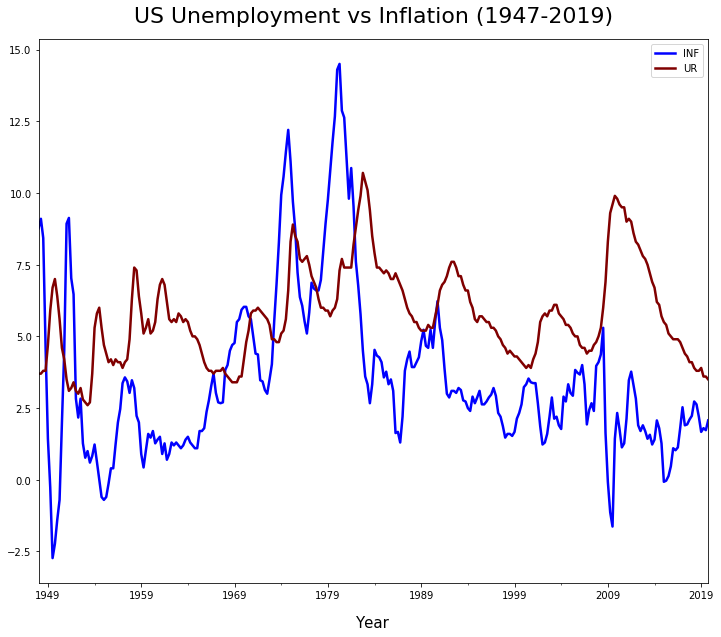

In [28]:
merge_df3.set_index('qtr_dt')['INF'].plot(figsize=(12, 10), linewidth=2.5, color='blue')
merge_df3.set_index('qtr_dt')['UR'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.title("US Unemployment vs Inflation (1947-2019)", y=1.02, fontsize=22)
plt.xlabel("Year", labelpad=15, fontsize =15)
plt.savefig("US Unemployment vs Inflation (1947-2019).png")
plt.legend()


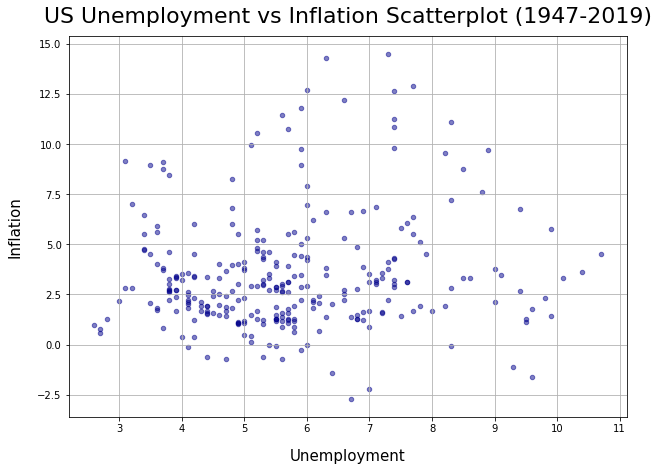

In [29]:
merge_df3.plot(kind='scatter', x='UR', y='INF', color='darkblue', alpha=0.5, figsize=(10, 7), grid = True)
plt.title("US Unemployment vs Inflation Scatterplot (1947-2019)", y=1.02, fontsize=22)
plt.xlabel("Unemployment", labelpad=15, fontsize =15)
plt.ylabel("Inflation", labelpad=15, fontsize =15)
plt.savefig("US Unemployment vs Inflation Scatterplot (1947-2019).png")
#plt.legend()

In [ ]:
UR = 'UR.csv'

df = pd.read_csv(UR)

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['UR'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "%",
))

fig.update_layout(
    title_text = '2020 Unemployment Rate by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()